## PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow

In [87]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build mode",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading model",
    6: "putting it all together"
}

In [88]:
what_were_covering

{1: 'data (prepare and load)',
 2: 'build mode',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading model',
 6: 'putting it all together'}

In [89]:
import torch
from torch import nn # nn contains all building blocks of PyTorch for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version

torch.__version__

'2.6.0+cu124'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel sreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:

1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**.

In [90]:
# Create a *known* parameters

weight = 0.7
bias = 0.3

# Create

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [91]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [92]:
# Create a train/test split

train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split: ], y[train_split: ]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [93]:
def plot_predictions(train_data=X_train,
                      train_labels = y_train,
                      test_data = X_test,
                      test_labels=y_test,
                      predictions=None):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot predictions if they exist'
    print(test_data.shape, predictions.shape)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  # Show the legend
  plt.legend(prop={"size": 14});


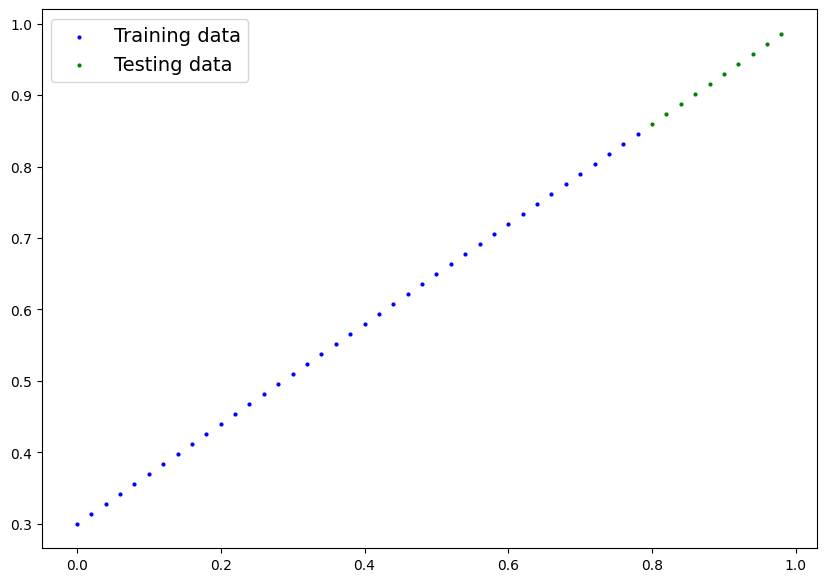

In [94]:
plot_predictions();

## 2. Build model

My first PyTorch model!
This is very exciting.. let's do it!

Because we're going to be building classes throught the course, I'd recommend getting familiar with OOP in Python, to do so you can use the following resources from Real Python: https://realpython.com/python3-object-oriented-programming/

What my model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (The weight & bias values we used to create data)

How does it do so?

Through two main algorithms:

1. Gradient descent
2. Backpropagation

In [95]:
from torch import nn

# Create linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # This is the linear regression formula


## Making predictions using *torch.inference_mode()*

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`

When we pass data through model, it's going to run it through `forward()` method.

In [96]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)

model_0 = LinearRegressionModel()



In [97]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [98]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [99]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [100]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

torch.Size([10, 1]) torch.Size([10, 1])


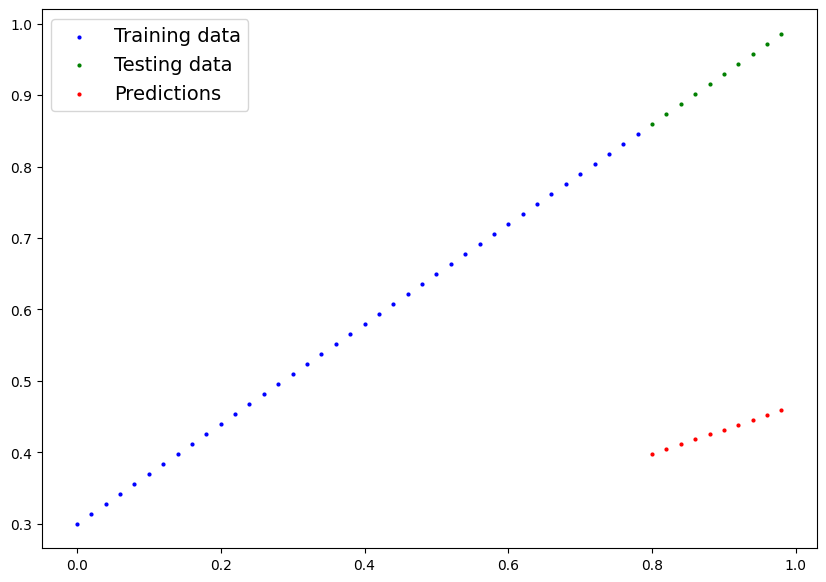

In [101]:
plot_predictions(predictions=y_preds)

In [102]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [103]:
with torch.no_grad():
  y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [104]:
# Set up a loss function
loss_function = nn.L1Loss()

# Set up optimizer (stochastic gradient descent)

optimizer = torch.optim.SGD(params=model_0.parameters(),
                                lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set

In [105]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

## Building a training loop (and a testing loop) in PyTorch

In [106]:
# An epoch is one loop through the data ... (this is a hyperparameter because we've set it ourselves)
epochs = 200

### Training

# Track different values

epoch_count = []
loss_values = []
test_loss_values = []



# 0. Loop through data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients


  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_function(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of model
  loss.backward()

  # 5. Set  the optimizer (preform gradient descent)
  optimizer.step()  # by default how the optimizer changes will accumulate through the loop so .. we have to zero them above in step 3

  model_0.eval() # turns off different settings in te model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_function(test_pred, y_test)


  # print("what's happening")
  if epoch%10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(model_0.state_dict())




Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [107]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6990], requires_grad=True),
 Parameter containing:
 tensor([0.3093], requires_grad=True)]

In [108]:
weight, bias

(0.7, 0.3)

torch.Size([10, 1]) torch.Size([10, 1])


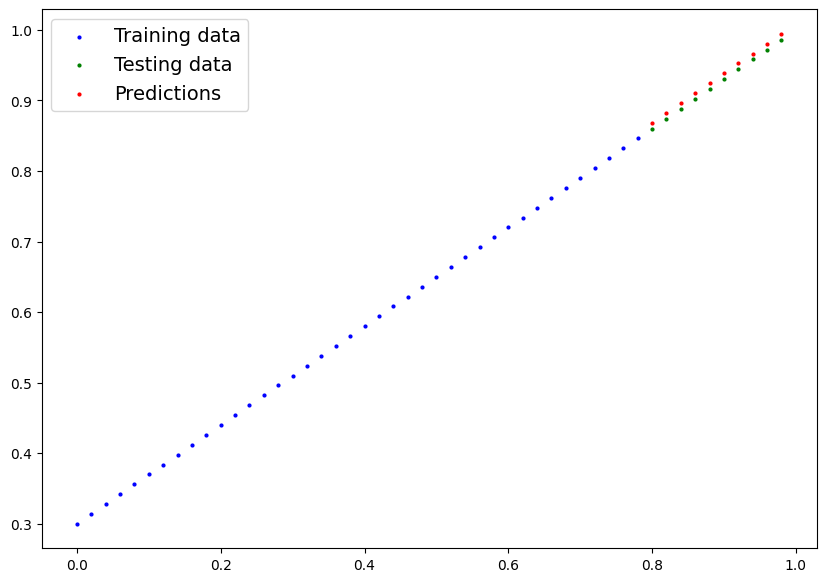

In [109]:
plot_predictions(predictions=test_pred)

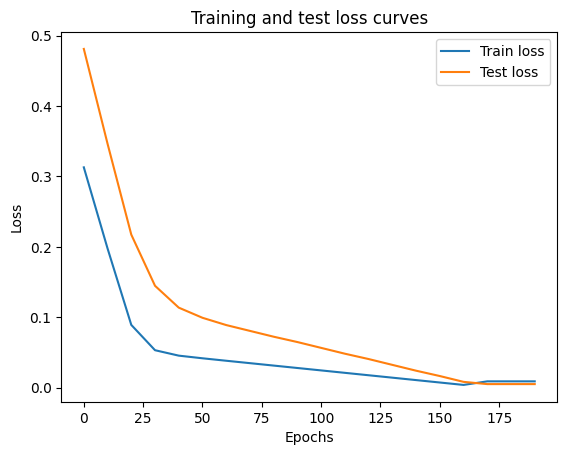

In [110]:
# Plot the loss curves

plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


## Putting it all together

Let's go back through the steps above and see it all in one place.

In [125]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

Create device-agnostic code.

This means If we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.


In [126]:
# Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [127]:
!nvidia-smi

Thu Mar 20 03:42:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   69C    P0             34W /   70W |     158MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 6.1 Data

In [128]:
# Create some data using the linear regression formula of y = weight * X + bias

weight = 0.7
bias = 0.3

# Create a range values
start = 0
end = 1
step = 0.03

# Create X, y (feature and label)

X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze error will pop up
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0300],
         [0.0600],
         [0.0900],
         [0.1200],
         [0.1500],
         [0.1800],
         [0.2100],
         [0.2400],
         [0.2700]]),
 tensor([[0.3000],
         [0.3210],
         [0.3420],
         [0.3630],
         [0.3840],
         [0.4050],
         [0.4260],
         [0.4470],
         [0.4680],
         [0.4890]]))

In [131]:
# Slit the data

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(27, 27, 7, 7)

In [130]:
def plot_predictions(train_data=X_train,
                      train_labels = y_train,
                      test_data = X_test,
                      test_labels=y_test,
                      predictions=None):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot predictions if they exist'
    print(test_data.shape, predictions.shape)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  # Show the legend
  plt.legend(prop={"size": 14});


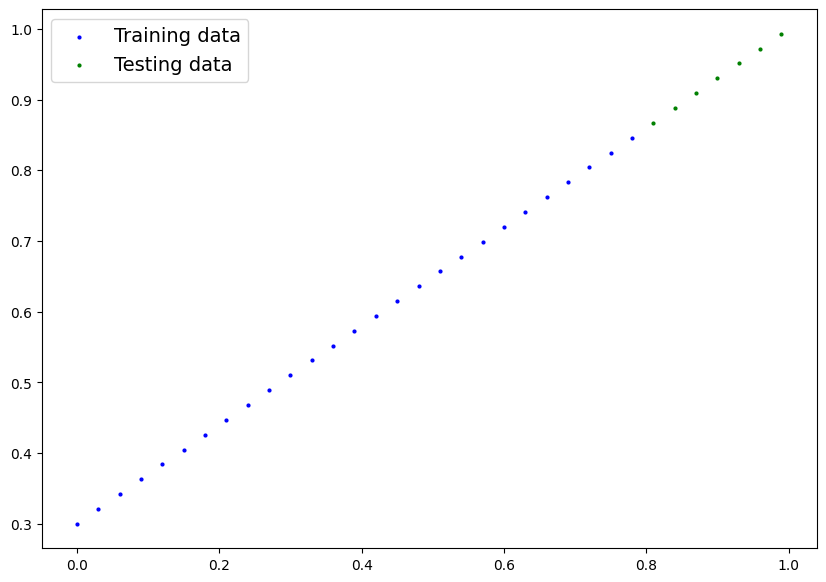

In [132]:
# plot the data
# note: If you don't have plot_predictions() function load, this will error

plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear model

In [133]:
# Creating a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [134]:
# Check the model current device

next(model_1.parameters()).device

# Put data on the target device (device-agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

## 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [135]:
# Set up loss function

loss_fn = nn.L1Loss()

# Setup optimizer

optimizer = torch.optim.SGD(params = model_1.parameters(), lr=0.001)


In [136]:
# Let's write a training loop

torch.manual_seed(42)

epochs = 2000

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad

  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss {loss} | Test loss {test_loss}")



Epoch: 0 | Loss 0.5551779270172119 | Test loss 0.5867416262626648
Epoch: 10 | Loss 0.5436570644378662 | Test loss 0.5732318758964539
Epoch: 20 | Loss 0.5321362614631653 | Test loss 0.5597220063209534
Epoch: 30 | Loss 0.5206153988838196 | Test loss 0.5462121963500977
Epoch: 40 | Loss 0.5090945959091187 | Test loss 0.5327023863792419
Epoch: 50 | Loss 0.49757370352745056 | Test loss 0.5191925168037415
Epoch: 60 | Loss 0.48605287075042725 | Test loss 0.5056827664375305
Epoch: 70 | Loss 0.47453203797340393 | Test loss 0.4921729564666748
Epoch: 80 | Loss 0.4630112051963806 | Test loss 0.4786631464958191
Epoch: 90 | Loss 0.4514903426170349 | Test loss 0.46515336632728577
Epoch: 100 | Loss 0.4399694800376892 | Test loss 0.4516434967517853
Epoch: 110 | Loss 0.4284486472606659 | Test loss 0.43813371658325195
Epoch: 120 | Loss 0.4169277548789978 | Test loss 0.42462387681007385
Epoch: 130 | Loss 0.4054069519042969 | Test loss 0.4111140966415405
Epoch: 140 | Loss 0.39388611912727356 | Test loss 0.3

In [137]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6997]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3005], device='cuda:0'))])

In [138]:
weight, bias

(0.7, 0.3)

# 6.4 Turn model into evaluation mode


In [139]:
# Turn model into evaluation mode

model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8672],
        [0.8882],
        [0.9092],
        [0.9302],
        [0.9512],
        [0.9722],
        [0.9932]], device='cuda:0')

torch.Size([7, 1]) torch.Size([7, 1])


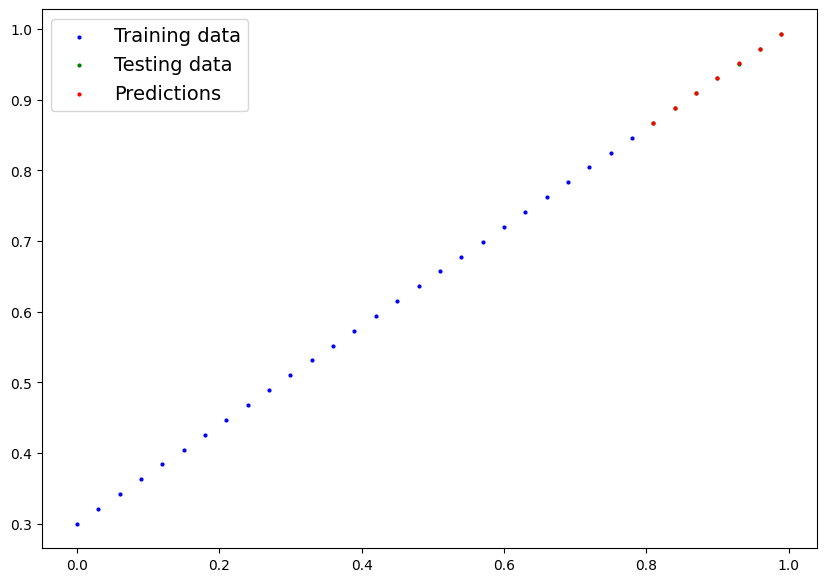

In [140]:
plot_predictions(predictions=y_preds.cpu())

# 6.5 Saving & loading trained model

In [143]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [145]:
# Load PyTorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [147]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [148]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6997]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3005], device='cuda:0'))])

In [149]:
# Evaluate the loaded model

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds = loaded_model_1_preds

In [150]:
y_preds

tensor([[0.8672],
        [0.8882],
        [0.9092],
        [0.9302],
        [0.9512],
        [0.9722],
        [0.9932]], device='cuda:0')